###**The final idea is to get an 'LBC market price' for canon 7D body only**

> **Scope**: *Ile de France*

***Articles/Ressources that help me along the way***
- [Git repo: JM Portilla Web Scraping Tuto](https://github.com/jmportilla/Web-Scraping/blob/master/Web%20Scraping.ipynb)
- [Article: Querying Craiglist](http://predictablynoisy.com/querying-craigslist-with-python/)
- [Article: Quick Craiglist Data Analysis](http://predictablynoisy.com/quick-craigslist-data-analysis/)
- Useful Links:
    - http://stackoverflow.com/questions/16835449/python-beautifulsoup-extract-text-between-element#
- [Formating IPython Notebook with Markdown¶](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#videos)
- [Scraping multiple pages for parsing in Beautiful Soup](http://stackoverflow.com/questions/8334805/scraping-multiple-pages-for-parsing-in-beautiful-soup)

In [47]:
# Libraries export
from bs4 import BeautifulSoup
import requests

import pandas as pd
from pandas import Series, DataFrame

# regex module
import re

In [102]:
# Méthode pas très classe, à reprendre
page_number = ['1', '2', '3', '4', '5', '6', '7', '8']
data = []

for numb in page_number:
    url = 'https://www.leboncoin.fr/annonces/offres/ile_de_france/occasions/?o=' + numb + '&q=canon+7D'
    result = requests.get(url)
    c = result.content
    soup = BeautifulSoup(c)
    summary = soup.findAll(True, {'class':['title', 'price']})
    for content in summary:
        purchase_info = content.contents[0].strip()
        data.append(purchase_info)

In [49]:
#url = 'https://www.leboncoin.fr/annonces/offres/ile_de_france/occasions/?o=1&q=canon+7D'

# Request content from web page
#result = requests.get(url)
#c = result.content

# Set as Beautiful Soup Object
#soup = BeautifulSoup(c)

# Take all title and price tag
#summary = soup.findAll(True, {'class':['title', 'price']})

In [50]:
#for content in summary:
#    print content.contents[0].strip()

In [51]:
# Set up empty data list
#data = []

#for content in summary:
    #purchase_info = content.contents[0].strip()
    #data.append(purchase_info)

In [52]:
type(data)

list

In [77]:
data[:10]

[u'Sigma 120-300 f2.8 EX HSM OS+Sigma 1.4+Canon 7D',
 u'1 300\xa0\u20ac',
 u'Canon EOS 7D + 24-105 f4',
 u'950\xa0\u20ac',
 u'CANON 5D Mark III Garantie FNAC 1 AN',
 u'2 000\xa0\u20ac',
 u'Canon EOS 7 D boitier',
 u'550\xa0\u20ac',
 u'Nouveau Canon EF 100-400mm f/4.5-5.6L IS mark 2 II',
 u'1 750\xa0\u20ac']

In [55]:
# Function to check if there is a number in the string
# http://stackoverflow.com/questions/19859282/check-if-a-string-contains-a-number
# def num_there(s):
#    return any(i.isdigit() for i in s)


# https://www.udemy.com/learning-python-for-data-analysis-and-visualization/learn/#/lecture/2819010

# Set up empty lists
title = []
price = []

# Set index counter
index = 0

# Put title and price in different list
# there seems to be a natural 'counting index' in for...in... loop > hence the index+=1
for item in data:
    
    # if '€' in item, put the item before in 'title' and the current item in 'price'
    if u'\xa0\u20ac' in item:
        title.append(data[index-1])
        price.append(item)
    
    index += 1

In [56]:
title = Series(title)
price = Series(price)

In [57]:
# Concatenate into a DataFrame
annonce_df = pd.concat([title,price],axis=1)

In [58]:
annonce_df.columns = ['Title','Price']

In [59]:
type(annonce_df)

pandas.core.frame.DataFrame

In [60]:
annonce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 0 to 290
Data columns (total 2 columns):
Title    291 non-null object
Price    291 non-null object
dtypes: object(2)
memory usage: 6.8+ KB


In [61]:
annonce_df['Price'] = annonce_df['Price'].replace(u'\xa0', ' ')
annonce_df.head(5)

,Title,Price
0,Sigma 120-300 f2.8 EX HSM OS+Sigma 1.4+Canon 7D,1 300 €
1,Canon EOS 7D + 24-105 f4,950 €
2,CANON 5D Mark III Garantie FNAC 1 AN,2 000 €
3,Canon EOS 7 D boitier,550 €
4,Nouveau Canon EF 100-400mm f/4.5-5.6L IS mark ...,1 750 €


In [62]:
annonce_df.dtypes

Title    object
Price    object
dtype: object

In [110]:
# Replace € and replace white space and then convert to int
annonce_df['Price'] = annonce_df['Price'].replace( u'\u20ac','', regex=True ).replace(' ', '',regex=True).astype(int)
annonce_df.head(30)

,Title,Price,Price Cat,Annonce Cat
0,Sigma 120-300 f2.8 EX HSM OS+Sigma 1.4+Canon 7D,1300,1001 - 1500,bundle
1,Canon EOS 7D + 24-105 f4,950,501 - 1000,bundle
2,CANON 5D Mark III Garantie FNAC 1 AN,2000,Over 1500,Mark II
3,Canon EOS 7 D boitier,550,501 - 1000,body
4,Nouveau Canon EF 100-400mm f/4.5-5.6L IS mark ...,1750,Over 1500,Mark II
5,Flash cobra,50,0 - 500,body
6,Canon eos 7d,950,501 - 1000,body
7,Locations matériels photo vidéo reportage studio,10,0 - 500,body
8,Canon 7D mark II,990,501 - 1000,Mark II
9,Objectif tamron af 90mm 2.8 Di macro Canon,250,0 - 500,body


In [66]:
annonce_df.dtypes

Title    object
Price     int64
dtype: object

In [67]:
annonce_df.describe()

,Price
count,291.000000
mean,563.749141
std,620.396744
min,1.000000
25%,100.000000
50%,500.000000
75%,800.000000
max,6400.000000


In [68]:
def cat_500(price):
    if 0 <= price <= 500:
        return '0 - 500'
    if 501 <= price <= 1000:
        return '501 - 1000'
    if 1001 <= price <= 1500:
        return '1001 - 1500'
    if 1501 <= price:
        return 'Over 1500'
    
annonce_df['Price Cat'] = annonce_df['Price'].apply(cat_500).astype(str)
annonce_df.head()

,Title,Price,Price Cat
0,Sigma 120-300 f2.8 EX HSM OS+Sigma 1.4+Canon 7D,1300,1001 - 1500
1,Canon EOS 7D + 24-105 f4,950,501 - 1000
2,CANON 5D Mark III Garantie FNAC 1 AN,2000,Over 1500
3,Canon EOS 7 D boitier,550,501 - 1000
4,Nouveau Canon EF 100-400mm f/4.5-5.6L IS mark ...,1750,Over 1500


In [69]:
annonce_df.dtypes

Title        object
Price         int64
Price Cat    object
dtype: object

In [109]:
# not so pretty, or method does not seem to work, find why?
def annonce_cat(title):
    if 'objectif' in title:
        return 'bundle'
    if 'objectifs' in title:
        return 'bundle'
    if '+' in title:
        return 'bundle'
    if ',' in title:
        return 'bundle'
    if 'II' in title:
        return 'Mark II'
    else: 
        return 'body'

annonce_df['Annonce Cat'] = annonce_df['Title'].apply(annonce_cat)
annonce_df.head()

,Title,Price,Price Cat,Annonce Cat
0,Sigma 120-300 f2.8 EX HSM OS+Sigma 1.4+Canon 7D,1300,1001 - 1500,bundle
1,Canon EOS 7D + 24-105 f4,950,501 - 1000,bundle
2,CANON 5D Mark III Garantie FNAC 1 AN,2000,Over 1500,Mark II
3,Canon EOS 7 D boitier,550,501 - 1000,body
4,Nouveau Canon EF 100-400mm f/4.5-5.6L IS mark ...,1750,Over 1500,Mark II


####Cleaned DF

In [103]:
cleaned_df = annonce_df[annonce_df['Title'].str.contains('(7D|7d)', regex=True)]
cleaned_df.head(10)

,Title,Price,Price Cat,Annonce Cat
0,Sigma 120-300 f2.8 EX HSM OS+Sigma 1.4+Canon 7D,1300,1001 - 1500,bundle
1,Canon EOS 7D + 24-105 f4,950,501 - 1000,bundle
6,Canon eos 7d,950,501 - 1000,body
8,Canon 7D mark II,990,501 - 1000,Mark II
12,Canon 7D + EF-S 15-85 + 50mm 1.8 + accessoires,1000,501 - 1000,bundle
18,Canon 7d + Accessoires,200,0 - 500,bundle
19,Grip pour DSLR Canon EOS 7D,45,0 - 500,body
22,"Canon 7D, Grip, 4 Objectifs, 2 Flashs, Accesso...",1600,Over 1500,bundle
26,Canon eos 7D mark II,900,501 - 1000,Mark II
29,Canon EOS 7d + 2 objectifs + garantie,999,501 - 1000,bundle


In [91]:
cleaned_df.describe()

,Price
count,131.000000
mean,810.908397
std,444.779279
min,15.000000
25%,600.000000
50%,750.000000
75%,950.000000
max,2900.000000


In [92]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[Box and whisker plot | Descriptive statistics | Probability and Statistics](https://www.youtube.com/watch?v=b2C9I8HuCe4&feature=youtu.be)

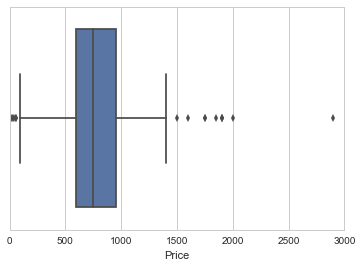

In [93]:
sns.set_style("whitegrid")
sns.boxplot(x='Price', data=cleaned_df)

In [104]:
body = cleaned_df[cleaned_df['Annonce Cat'] == 'body']
bundle = cleaned_df[cleaned_df['Annonce Cat'] == 'bundle']
mark_II = cleaned_df[cleaned_df['Annonce Cat'] == 'Mark II']

In [105]:
body.describe()

,Price
count,57.000000
mean,615.280702
std,323.452235
min,15.000000
25%,500.000000
50%,620.000000
75%,750.000000
max,1500.000000


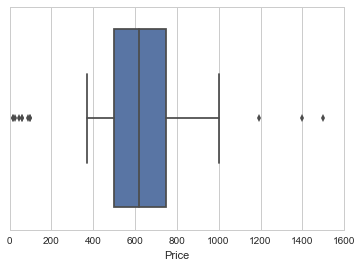

In [106]:
sns.set_style("whitegrid")
sns.boxplot(x='Price', data=body)

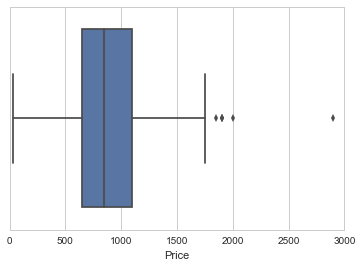

In [107]:
sns.set_style("whitegrid")
sns.boxplot(x='Price', data=bundle)

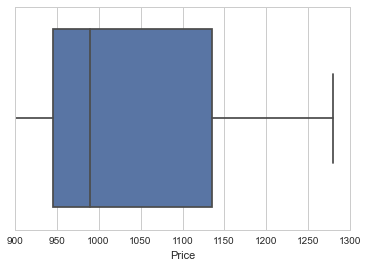

In [108]:
sns.set_style("whitegrid")
sns.boxplot(x='Price', data=mark_II)

---
**Areas of improvements**
- ~~change prices into integer~~
- Remove wrong 'annonces' and 'annonces' that sell also lenses
- add publishing dates of the 'annonce'